In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor ,AdaBoostClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,precision_score,mean_squared_error,r2_score


from sklearn.feature_selection import chi2 # for categorical fetures
from sklearn.feature_selection import f_classif # for numerical features (Anova f-test)


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
print(f"This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataframe has 920 rows and 16 columns.


In [6]:
print(f"The minimum id in id column is {df['id'].min()} and maximum id is {df['id'].max()}.")

The minimum id in id column is 1 and maximum id is 920.


print(f"The minimum age in age column is {df['age'].min()} and maximum age is {df['age'].max()}.")

In [11]:
import plotly.figure_factory as ff

hist_data = [df["age"].dropna()]
group_labels = ["Age"]

fig = ff.create_distplot(
    hist_data,
    group_labels,
    show_hist=True,
    show_rug=False
)

fig.update_layout(
    width=1000,
    height=550,
    title="Age Distribution"
)

fig.show()


Mean: 53.51086956521739
Median: 54.0
Mode: 54


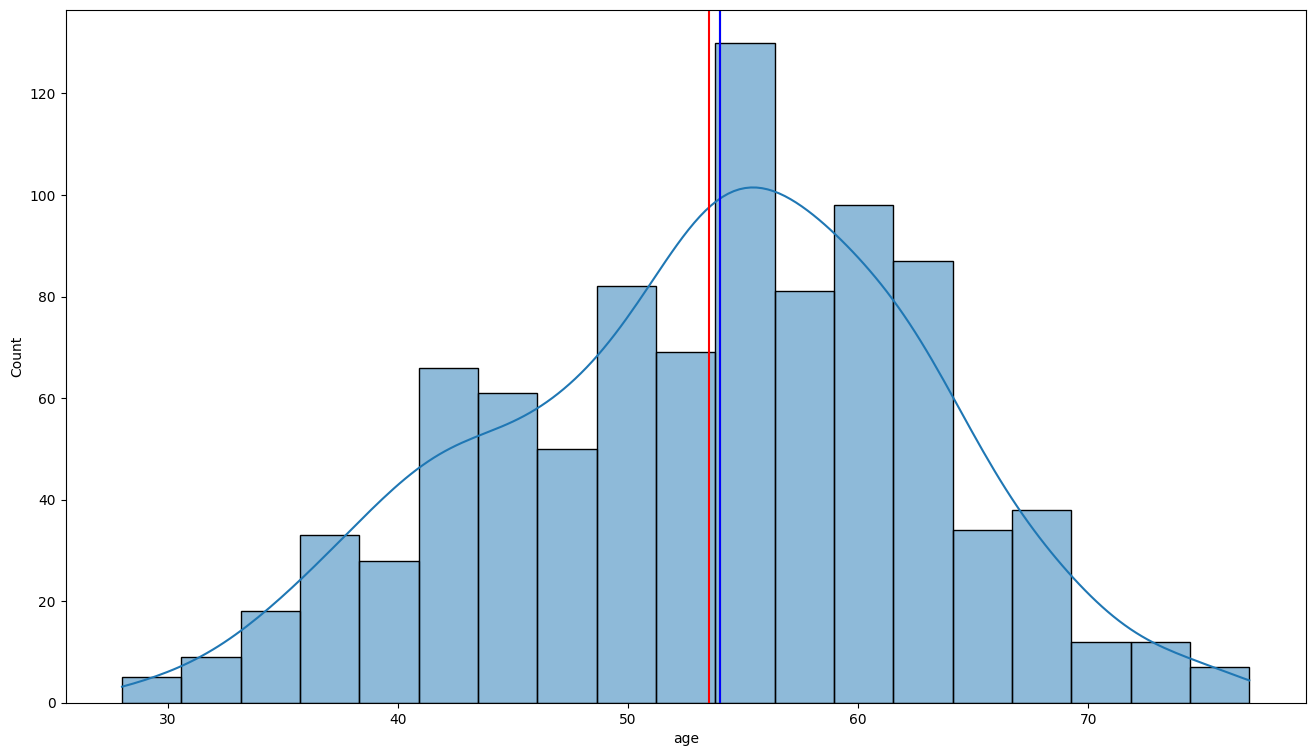

In [13]:
plt.figure(figsize=(16, 9))
sns.histplot(df["age"], kde=True)
plt.axvline(df["age"].mean(), color="r")
plt.axvline(df["age"].median(), color="g")
plt.axvline(df["age"].mode()[0], color="b")


print("Mean:", df["age"].mean())
print("Median:", df["age"].median())
print("Mode:", df["age"].mode()[0])

In [14]:
df["sex"].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [20]:
male = 726
female = 194
total = male + female


male_percentage = (male/total) * 100
female_percentage = (female/total) * 100


print(f"Male Percentage in data: {male_percentage:.2f}%")
print(f"Female Percentage in data: {female_percentage:.2f}%")


difference_peercentage = ((male - female)/ total) * 100
print(f"Males are {difference_peercentage:.2f}% more than females in the data.")

Male Percentage in data: 78.91%
Female Percentage in data: 21.09%
Males are 57.83% more than females in the data.


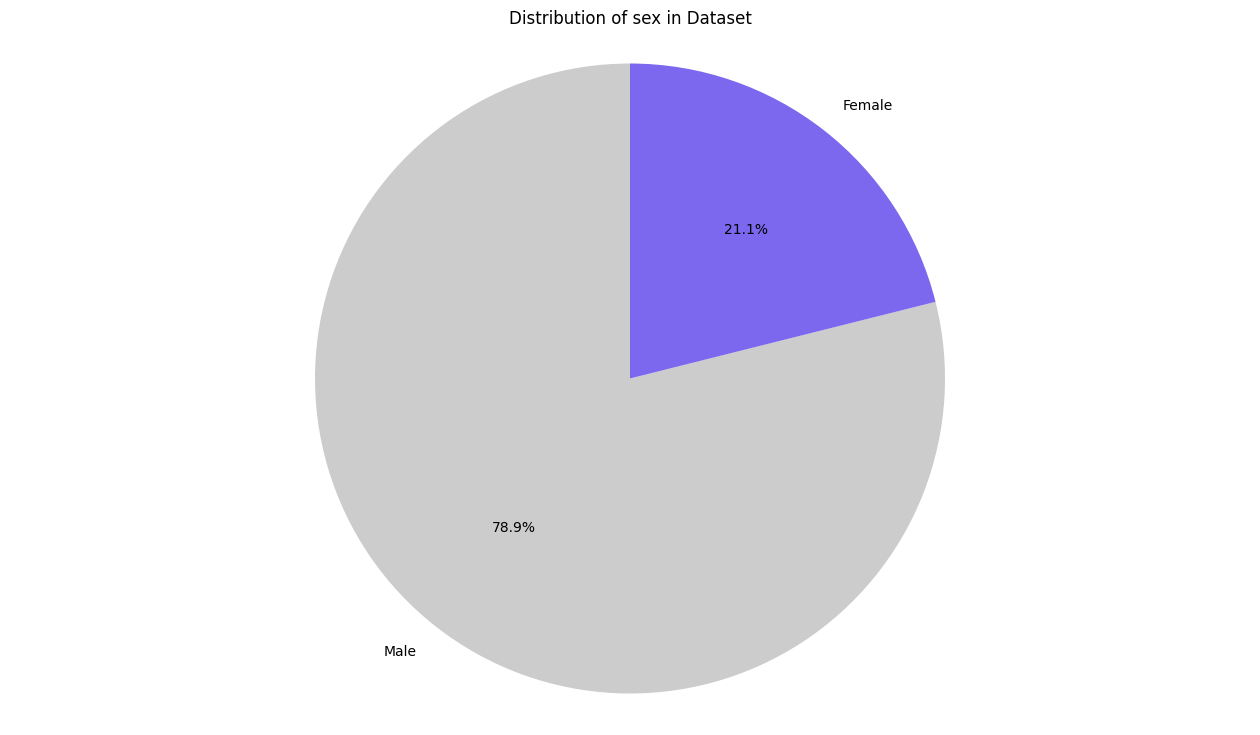

In [18]:
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['#CCCCCC','MediumSlateBlue']

fig1, ax1 = plt.subplots(figsize=(16, 9))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  

plt.title('Distribution of sex in Dataset')
plt.show()

In [21]:
print("Unique values count in dataset column:",df["dataset"].value_counts())

Unique values count in dataset column: dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


In [22]:
import plotly.express as px

categories = ['Cleveland', 'Hungary', 'VA Long Beach', 'Switzerland']
values = [304, 293, 200, 123]

fig = px.bar(
    x=categories,
    y=values,
    text=values,
    title="Places of Study"
)

fig.update_traces(
    marker_color=['blue', 'orange', 'green', 'red'],
    textposition='outside'
)

fig.update_layout(
    width=1000,   # 16:9 aspect ratio
    height=562,
    xaxis_title="Categories",
    yaxis_title="Values"
)

fig.show()

In [23]:
print(df.groupby("sex")["dataset"].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [24]:
print("Value count of cp column:",df["cp"].value_counts())

Value count of cp column: cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


In [25]:
import plotly.express as px

fig = px.histogram(
    df,
    x="cp",
    color="dataset",
    barmode="group",   
    title="Count of CP by Dataset"
)

fig.update_layout(
    width=1000,   # 16:9
    height=562,
    xaxis_title="cp",
    yaxis_title="Count"
)

fig.show()


In [26]:
fig_3 = px.histogram(data_frame=df,x="age",color="cp")
fig_3.show()

In [27]:
df["trestbps"].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

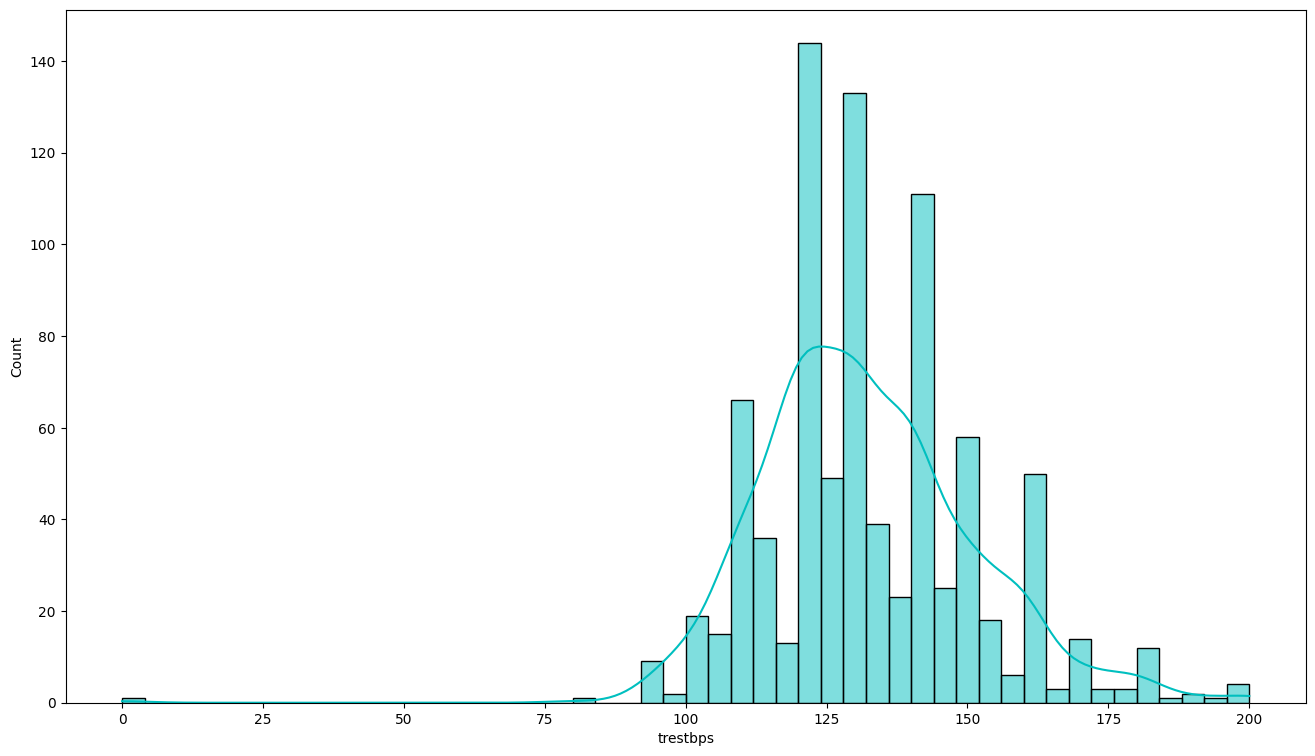

In [28]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df, x="trestbps", kde=True, bins=50, color='c')
plt.show()


In [29]:
df["chol"].value_counts()

chol
0.0      172
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

In [30]:
df["chol"].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

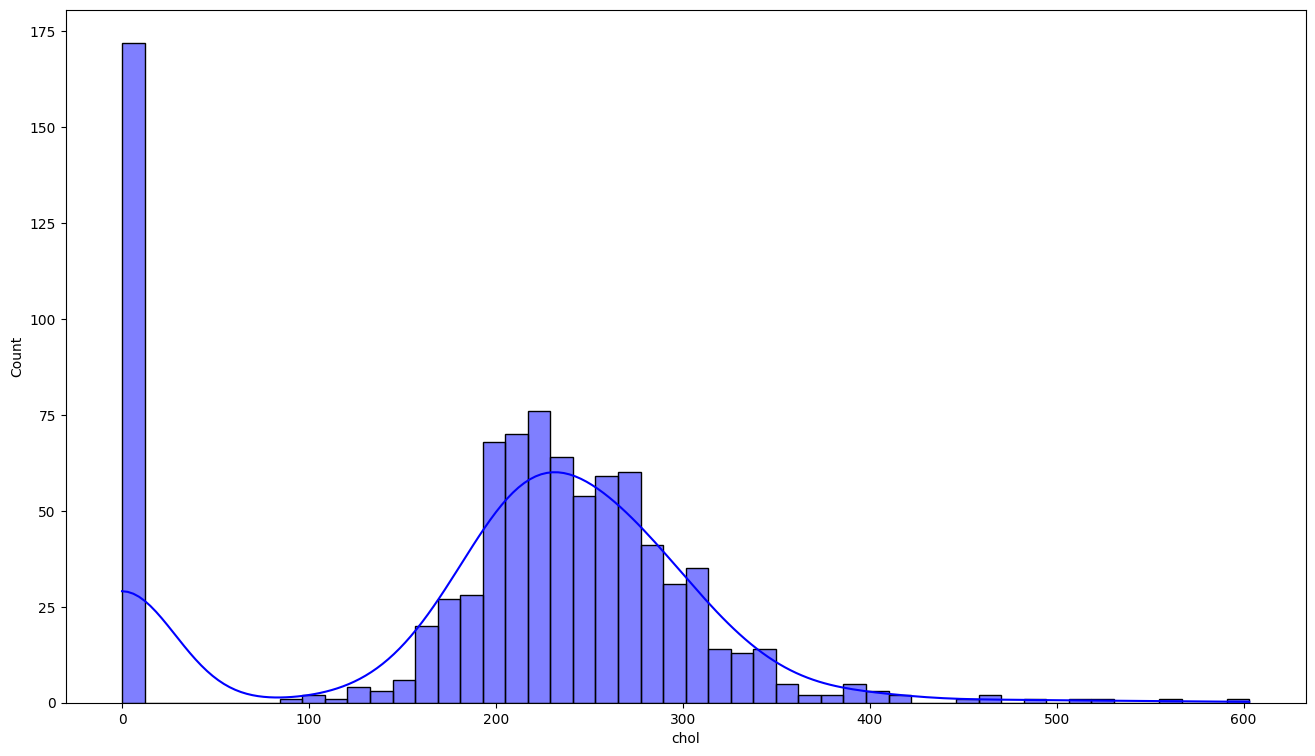

In [32]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df, x="chol", kde=True, bins=50, color='b')
plt.show()

In [33]:
df["fbs"].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

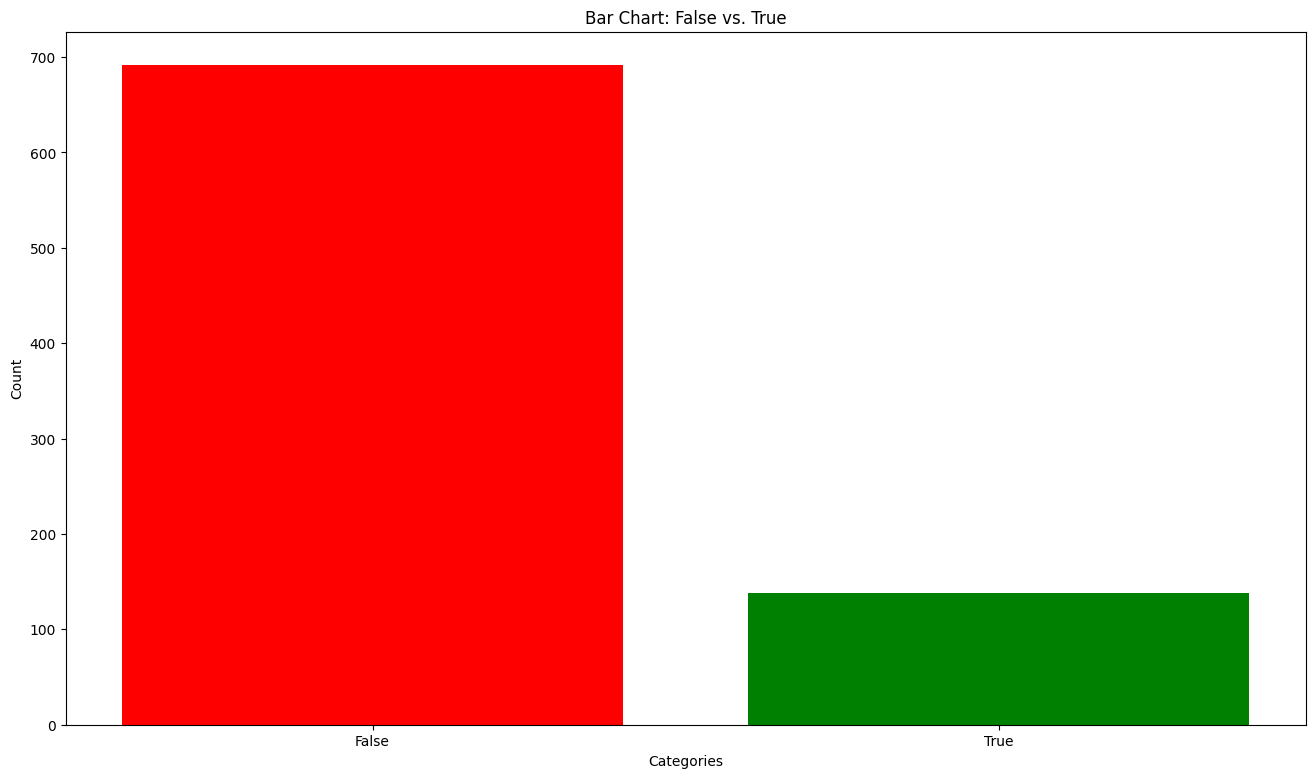

In [34]:
categories = ['False', 'True']
counts = [692, 138]


plt.figure(figsize=(16, 9))  
plt.bar(categories, counts, color=['red', 'green'])  
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart: False vs. True')
plt.show()


In [35]:
df["restecg"].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

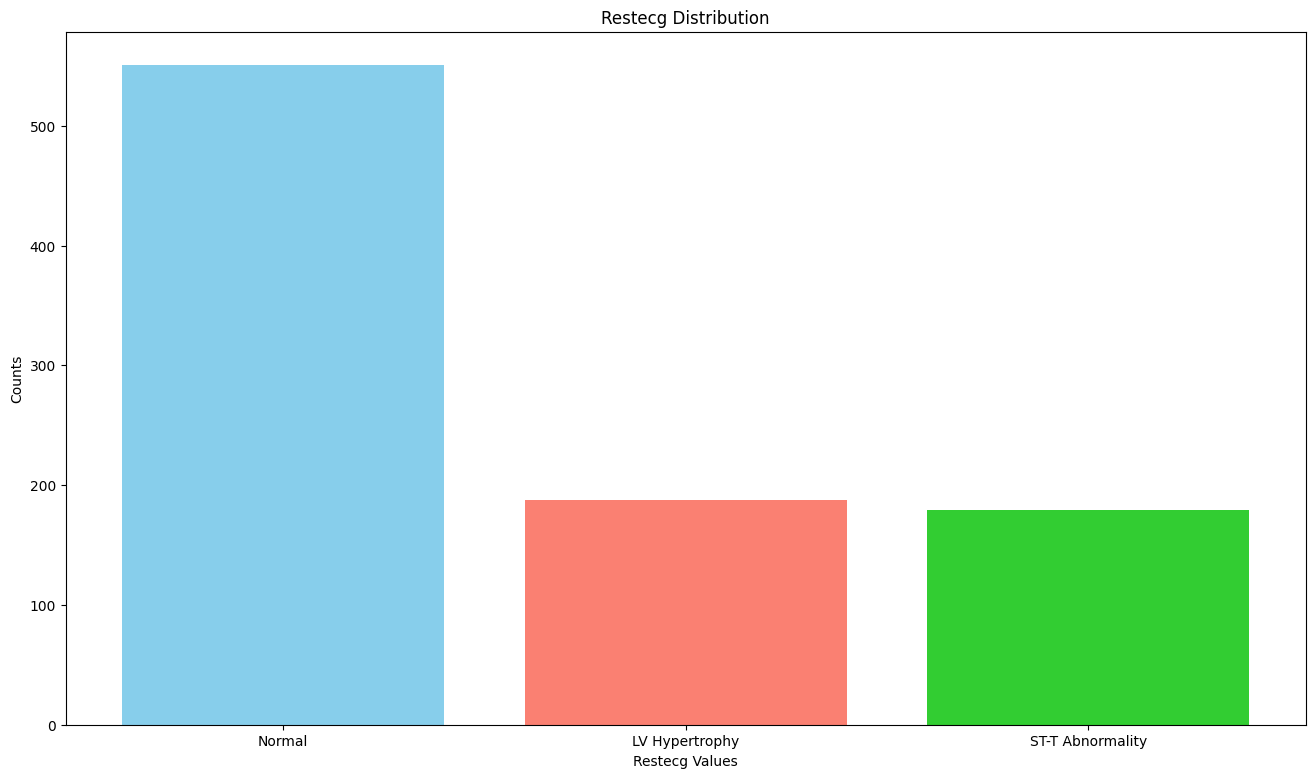

In [36]:
import matplotlib.pyplot as plt

values = ["Normal", "LV Hypertrophy", "ST-T Abnormality"]
counts = [551, 188, 179]
colors = ["skyblue", "salmon", "limegreen"]

plt.figure(figsize=(16, 9))
plt.bar(values, counts, color=colors)
plt.xlabel("Restecg Values")
plt.ylabel("Counts")
plt.title("Restecg Distribution")
plt.show()



In [37]:
df["thalch"].value_counts()

thalch
150.0    43
140.0    41
120.0    35
130.0    30
160.0    26
         ..
195.0     1
91.0      1
87.0      1
192.0     1
73.0      1
Name: count, Length: 119, dtype: int64

In [38]:
df["thalch"].describe()

count    865.000000
mean     137.545665
std       25.926276
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

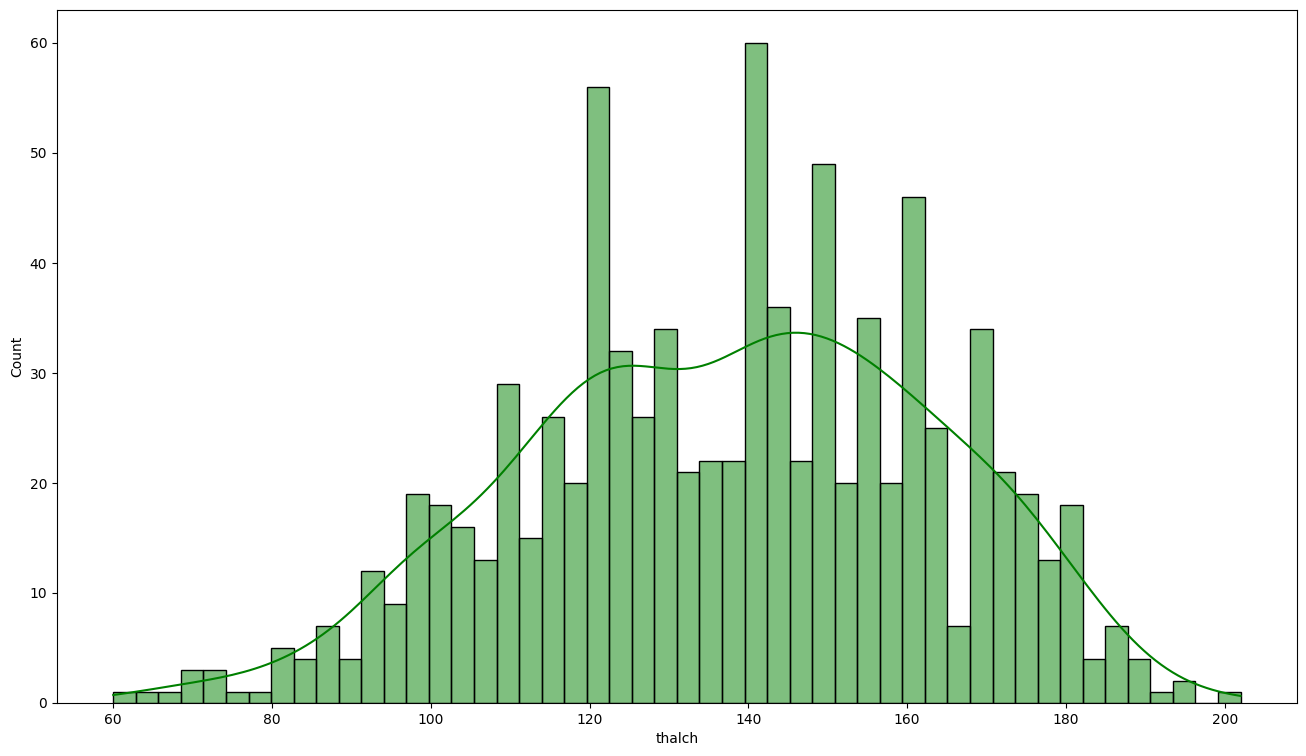

In [40]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df, x="thalch", kde=True, bins=50, color='g')
plt.show()

In [41]:
df["exang"].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [42]:
import plotly.express as px

labels = ['False', 'True']
sizes = [528, 337]

fig = px.pie(
    names=labels,
    values=sizes,
    title="Exercise-induced Angina (exang)"
)

fig.update_traces(
    pull=[0, 0.1],  
    textinfo="percent+label",
    marker=dict(colors=['#66b3ff', '#ff9999'])
)

fig.update_layout(
    width=1000,   # 16:9
    height=562,
    showlegend=True
)

fig.show()


In [43]:
df["oldpeak"].value_counts()

oldpeak
 0.0    370
 1.0     83
 2.0     76
 1.5     48
 3.0     28
 0.5     19
 1.2     17
 2.5     16
 1.4     15
 0.8     15
 1.6     14
 0.2     14
 0.6     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.6      7
 2.8      7
 1.3      5
 2.2      5
 0.7      5
 1.9      5
 0.3      5
 3.6      4
 2.4      4
 1.1      4
 0.9      4
 3.4      3
 1.7      2
-1.0      2
 4.2      2
 2.3      2
 2.1      2
-0.5      2
 3.2      2
 3.5      2
-0.8      1
-0.1      1
-0.9      1
-2.0      1
-0.7      1
-2.6      1
 6.2      1
-1.5      1
-1.1      1
 5.0      1
 4.4      1
 3.8      1
 2.9      1
 5.6      1
 3.1      1
 3.7      1
Name: count, dtype: int64

In [44]:
df["oldpeak"].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

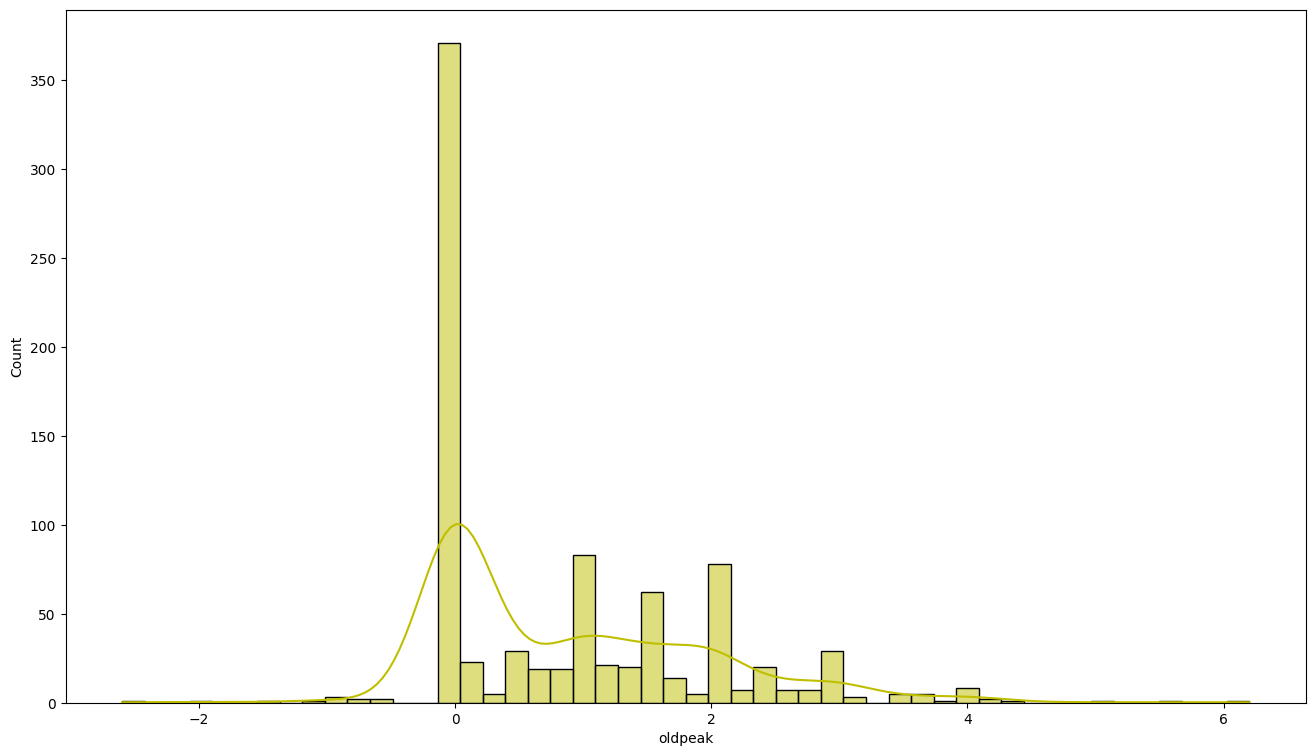

In [46]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df, x="oldpeak", kde=True, bins=50, color='y')
plt.show()

In [47]:
df["slope"].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [49]:
import plotly.graph_objects as go

# Data
slope_data = {
    "flat": 345,
    "upsloping": 203,
    "downsloping": 63
}
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(slope_data.keys()), y=list(slope_data.values()), mode='lines+markers', name='Slope'))
fig.update_layout(
    title="Slope of the Peak Exercise ST Segment",
    xaxis_title="Slope Type",
    yaxis_title="Count",
    showlegend=True
)
fig.show()


In [50]:
df["ca"].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

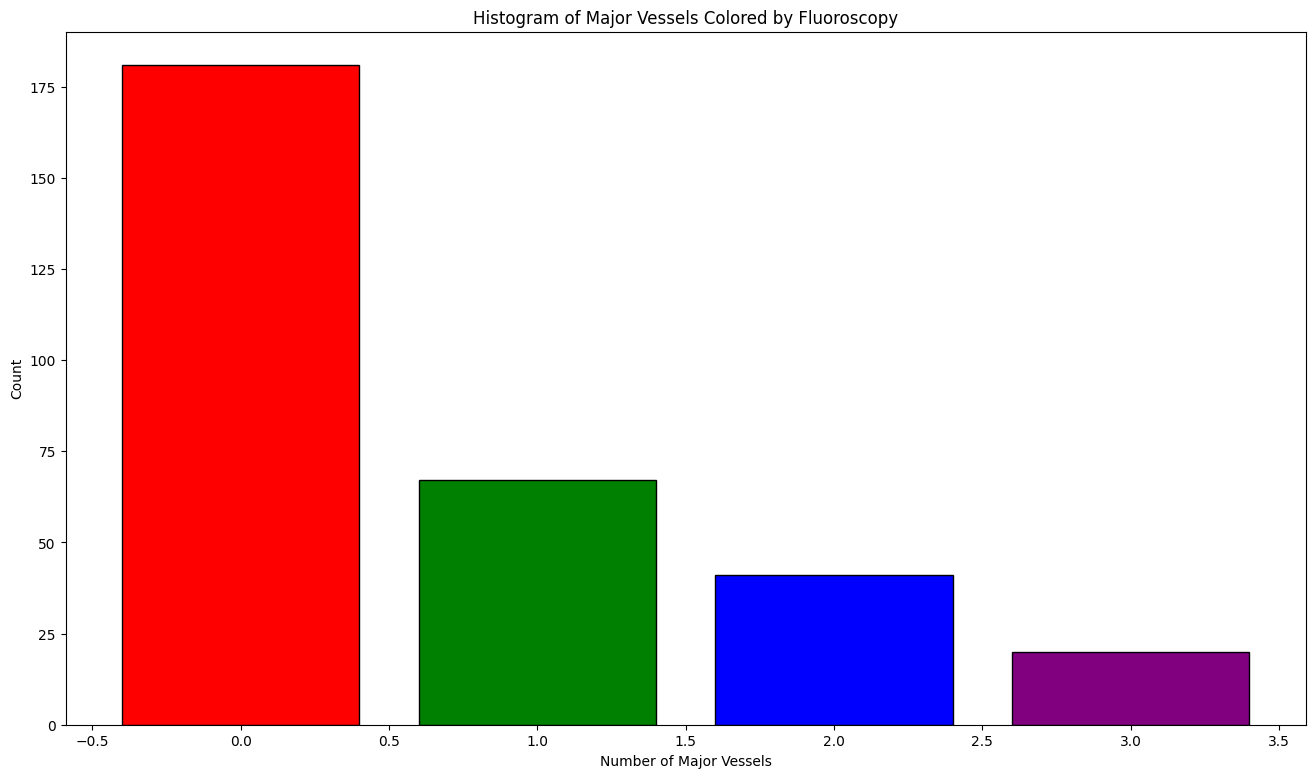

In [51]:
import matplotlib.pyplot as plt

# Data
categories = [0.0, 1.0, 2.0, 3.0]
counts = [181, 67, 41, 20]
colors = ['red', 'green', 'blue', 'purple']
plt.figure(figsize=(16, 9))
plt.bar(categories, counts, color=colors, edgecolor="black")
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.title("Histogram of Major Vessels Colored by Fluoroscopy")


plt.show()


In [52]:
df["thal"].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

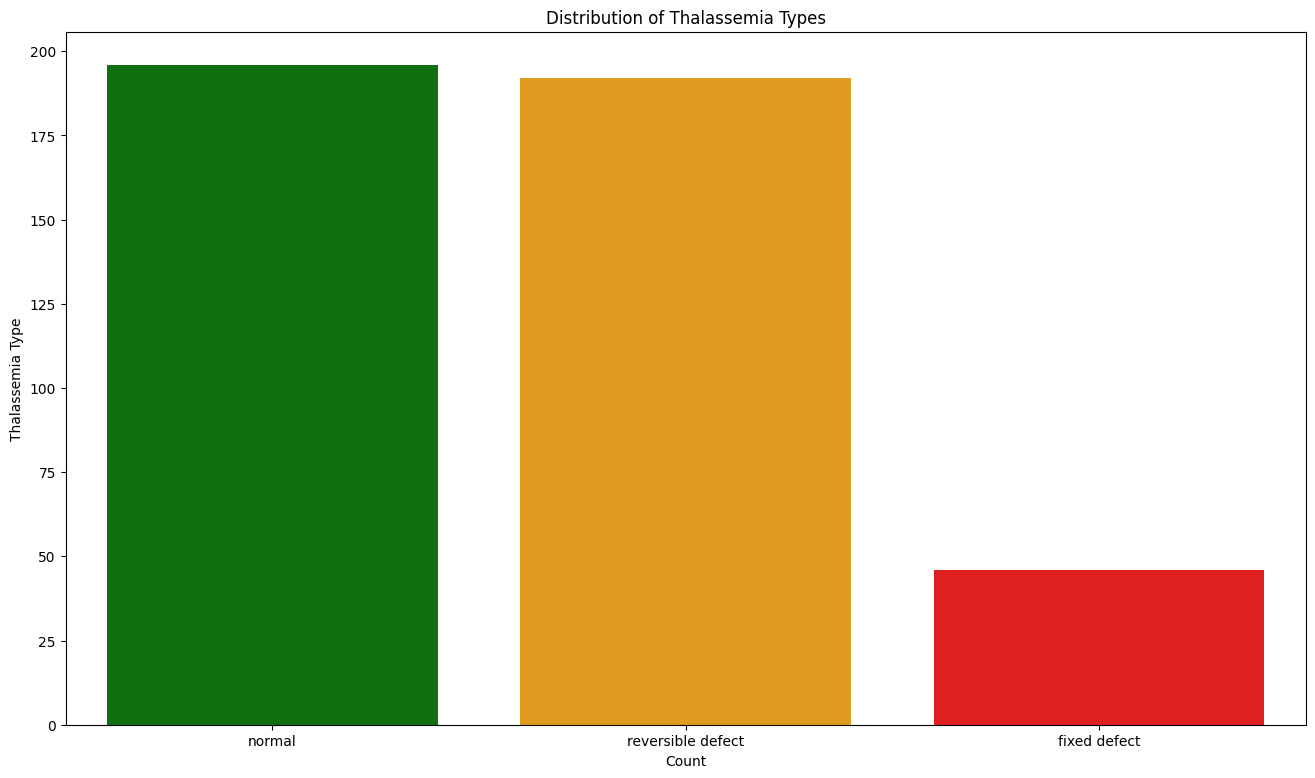

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
thal_values = ['normal'] * 196 + ['reversible defect'] * 192 + ['fixed defect'] * 46
plt.figure(figsize=(16, 9))
sns.countplot(x=thal_values, palette=['green', 'orange', 'red'])
plt.xlabel('Count')
plt.ylabel('Thalassemia Type')
plt.title('Distribution of Thalassemia Types')
plt.show()



In [55]:
df["num"].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [58]:
import plotly.express as px

labels = [
    'No Heart Disease (0)',
    'Stage 1 (1)',
    'Stage 2 (2)',
    'Stage 3 (3)',
    'Stage 4 (4)'
]

sizes = [411, 265, 109, 107, 28]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig = px.pie(
    names=labels,
    values=sizes,
    title="Distribution of Heart Disease Stages"
)

fig.update_traces(
    pull=[0.1, 0, 0, 0, 0],   
    textinfo="percent+label",
    marker=dict(colors=colors)
)

fig.update_layout(
    width=1000,   # 16:9
    height=562,
    showlegend=True
)

fig.show()


In [64]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [65]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.to_list()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [66]:
categorical_cols = ["thal","ca","exang","slope","restecg","fbs","cp","sex","num"]
bool_cols = ["fbs","exang"]
numeric_cols = ["oldpeak","thalch","chol","trestbps","age"]

In [67]:
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [68]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [69]:
import warnings
warnings.filterwarnings('ignore')
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.331560693641622 

RMSE = 17.284771740004153 

R2 = 0.0671644370054243 

Missing Values chol : 3.26%
MAE = 45.95556179775281 

RMSE = 64.58375827672208 

R2 = 0.6695808014087854 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.3 accuracy

Missing Values thalch : 5.98%
MAE = 16.68202312138728 

RMSE = 21.605738091930807 

R2 = 0.3212223593366593 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5640581395348837 

RMSE = 0.7862163365810817 

R2 = 0.4110992965178196 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



In [70]:
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [71]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

colors = ['red', 'green', 'blue', 'orange', 'purple']

fig = make_subplots(
    rows=3,
    cols=2,
    subplot_titles=numeric_cols
)

for i, col in enumerate(numeric_cols):
    row = i // 2 + 1
    col_pos = i % 2 + 1

    fig.add_trace(
        go.Box(
            x=df[col],
            name=col,
            marker_color=colors[i % len(colors)],
            boxmean=True
        ),
        row=row,
        col=col_pos
    )

fig.update_layout(
    width=1200,
    height=1200,
    title_text="Box Plots of Numeric Features",
    showlegend=False
)

fig.show()


In [72]:
df[df['trestbps'] == 0]
df = df[df['trestbps'] != 0]

In [73]:
dataset = df.copy()

In [74]:
categorical_columns_for_chi_squared_test = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [75]:
label_enc = LabelEncoder()
for col in categorical_columns_for_chi_squared_test:
    dataset[col] = label_enc.fit_transform(dataset[col])

In [76]:
X1 = dataset[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']]
y1 = dataset['num']

In [77]:
chi_scores = chi2(X1, y1)
chi2_scores = pd.DataFrame({"Feature": X1.columns, "Score": chi_scores[0]})
print(chi2_scores.sort_values(by="Score", ascending=False))

   Feature       Score
7       ca  353.525210
1       cp  161.895552
4    exang  111.257464
5    slope   42.406599
6     thal   23.133247
0      sex   18.455590
2      fbs   15.656211
3  restecg    3.492008


In [78]:
X_num_for_f_test = dataset[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

In [79]:
y_for_f_test = dataset['num']

In [80]:
f_scores, p_values = f_classif(X_num_for_f_test, y_for_f_test)

In [81]:
f_scores_df = pd.DataFrame({'Feature': X_num_for_f_test.columns, 'F-Score': f_scores})

In [82]:
print(f_scores_df.sort_values(by='F-Score', ascending=False))

    Feature    F-Score
4   oldpeak  57.151231
3    thalch  45.353296
0       age  31.249724
2      chol  17.757103
1  trestbps   5.115844


In [83]:
final_features = ['ca', 'cp', 'exang', 'slope', 'thal', 'oldpeak', 'thalch', 'age', 'chol', 'trestbps']

In [84]:
final_dataset = dataset[final_features + ['num']]

In [85]:
final_dataset.head()

,ca,cp,exang,slope,thal,oldpeak,thalch,age,chol,trestbps,num
0,0.0,3,0,0,0,2.3,150.0,63,233.0,145.0,0
1,3.0,0,1,1,1,1.5,108.0,67,286.0,160.0,2
2,2.0,0,1,1,2,2.6,129.0,67,229.0,120.0,1
3,0.0,2,0,0,1,3.5,187.0,37,250.0,130.0,0
4,0.0,1,0,2,1,1.4,172.0,41,204.0,130.0,0


In [86]:
final_dataset = df

In [87]:
df["num"].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

In [88]:
X = df.drop(['num'], axis=1)
y = df['num']

In [89]:
le = LabelEncoder()


for cols in X.columns:

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
        else:
            pass

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### **Importing Machine Learning Libraries**

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
   
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.6734693877551019
Test Accuracy: 0.6358695652173914

Model: Gradient Boosting
Cross-validation Accuracy: 0.6598639455782312
Test Accuracy: 0.6358695652173914

Model: Support Vector Machine
Cross-validation Accuracy: 0.5809523809523809
Test Accuracy: 0.5815217391304348

Model: Logistic Regression
Cross-validation Accuracy: 0.5129251700680272
Test Accuracy: 0.4891304347826087

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.582312925170068
Test Accuracy: 0.5869565217391305

Model: Decision Tree
Cross-validation Accuracy: 0.6231292517006802
Test Accuracy: 0.6467391304347826

Model: Ada Boost
Cross-validation Accuracy: 0.5945578231292517
Test Accuracy: 0.5489130434782609

Model: XG Boost
Cross-validation Accuracy: 0.6557823129251701
Test Accuracy: 0.6195652173913043

Model: Naive Bayes
Cross-validation Accuracy: 0.5823129251700682
Test Accuracy: 0.532608695652174

Best Model: Pipeline(steps=[('model', DecisionTreeClassifier(random_st

In [92]:
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))